 ## Example 2: Ground-spring-mass + spring-damper-Mass system (bond-graph model simulation)
Still 1-dim system, outputs defined by code (not by user input)

This model referenced as car suspention system

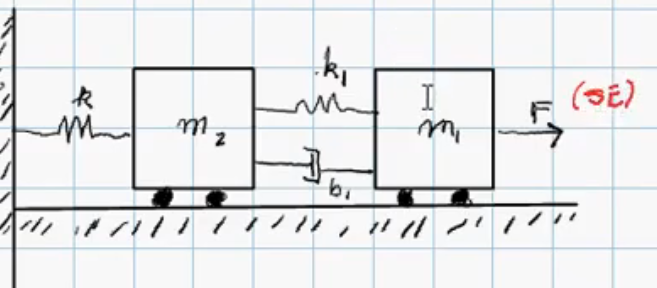

In [1]:

import sys
sys.path.append("../../")
from bond_graph_simulation.core.base import ElementFactory
from bond_graph_simulation.core.BondGraph2 import BondGraphModel
from bond_graph_simulation.rules.engine import RuleEngine
from bond_graph_simulation.equations.generator import EquationGenerator
from bond_graph_simulation.equations.statespace import CauchyFormGenerator
from bond_graph_simulation.equations.statespace import StateSpaceBuilder
from bond_graph_simulation.numerical.simulation import BondGraphSimulator


from bond_graph_simulation.inout.visualizer import draw_bond_graph, custom_layered_layout


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Создаем модель
model = BondGraphModel(name='Serial 2 mass connection with 2 springs and one damper and ground connection + external force')

# Создаем элементы (имена опциональны, position по желанию)
SE_2 = ElementFactory.create('SE', name='SE_2', )
SE_3 = ElementFactory.create('SE', name='SE_3',)
SF_2 = ElementFactory.create('SF', name='SF_2', )

C_2 = ElementFactory.create('C', name='C_2', )
C_3 = ElementFactory.create('C', name='C_3', )
R_2 = ElementFactory.create('R', name='R_2', )
I_2 = ElementFactory.create('I', name='I_2',)
I_3 = ElementFactory.create('I', name='I_3', )

OneJ_4 = ElementFactory.create('1', name='1j_4')
OneJ_5 = ElementFactory.create('1', name='1j_5')
OneJ_6 = ElementFactory.create('1', name='1j_6', )
OneJ_7 = ElementFactory.create('1', name='1j_7', )
OneJ_8 = ElementFactory.create('1', name='1j_8', )

ZeroJ_2 = ElementFactory.create('0', name='0j_2',)
ZeroJ_3 = ElementFactory.create('0', name='0j_3',)

# Соединяем элементы (как в оригинале)
model.connect(SE_2, OneJ_4)
model.connect(SE_3, OneJ_5)

model.connect(I_2, OneJ_4)
model.connect(OneJ_4, ZeroJ_2)
model.connect(ZeroJ_2, OneJ_5)
model.connect(ZeroJ_2, OneJ_6)
model.connect(C_2, OneJ_6)
model.connect(R_2, OneJ_6)
model.connect(OneJ_5, I_3)
model.connect(OneJ_5, ZeroJ_3)
model.connect(OneJ_7, ZeroJ_3)
model.connect(C_3, OneJ_7)
model.connect(OneJ_8, ZeroJ_3)
model.connect(OneJ_8, SF_2)


In [4]:
# Apply causality rules
engine = RuleEngine(model, debug=False)
engine.apply_all()
# engine.assign_sources_ports()

nodes len=  15


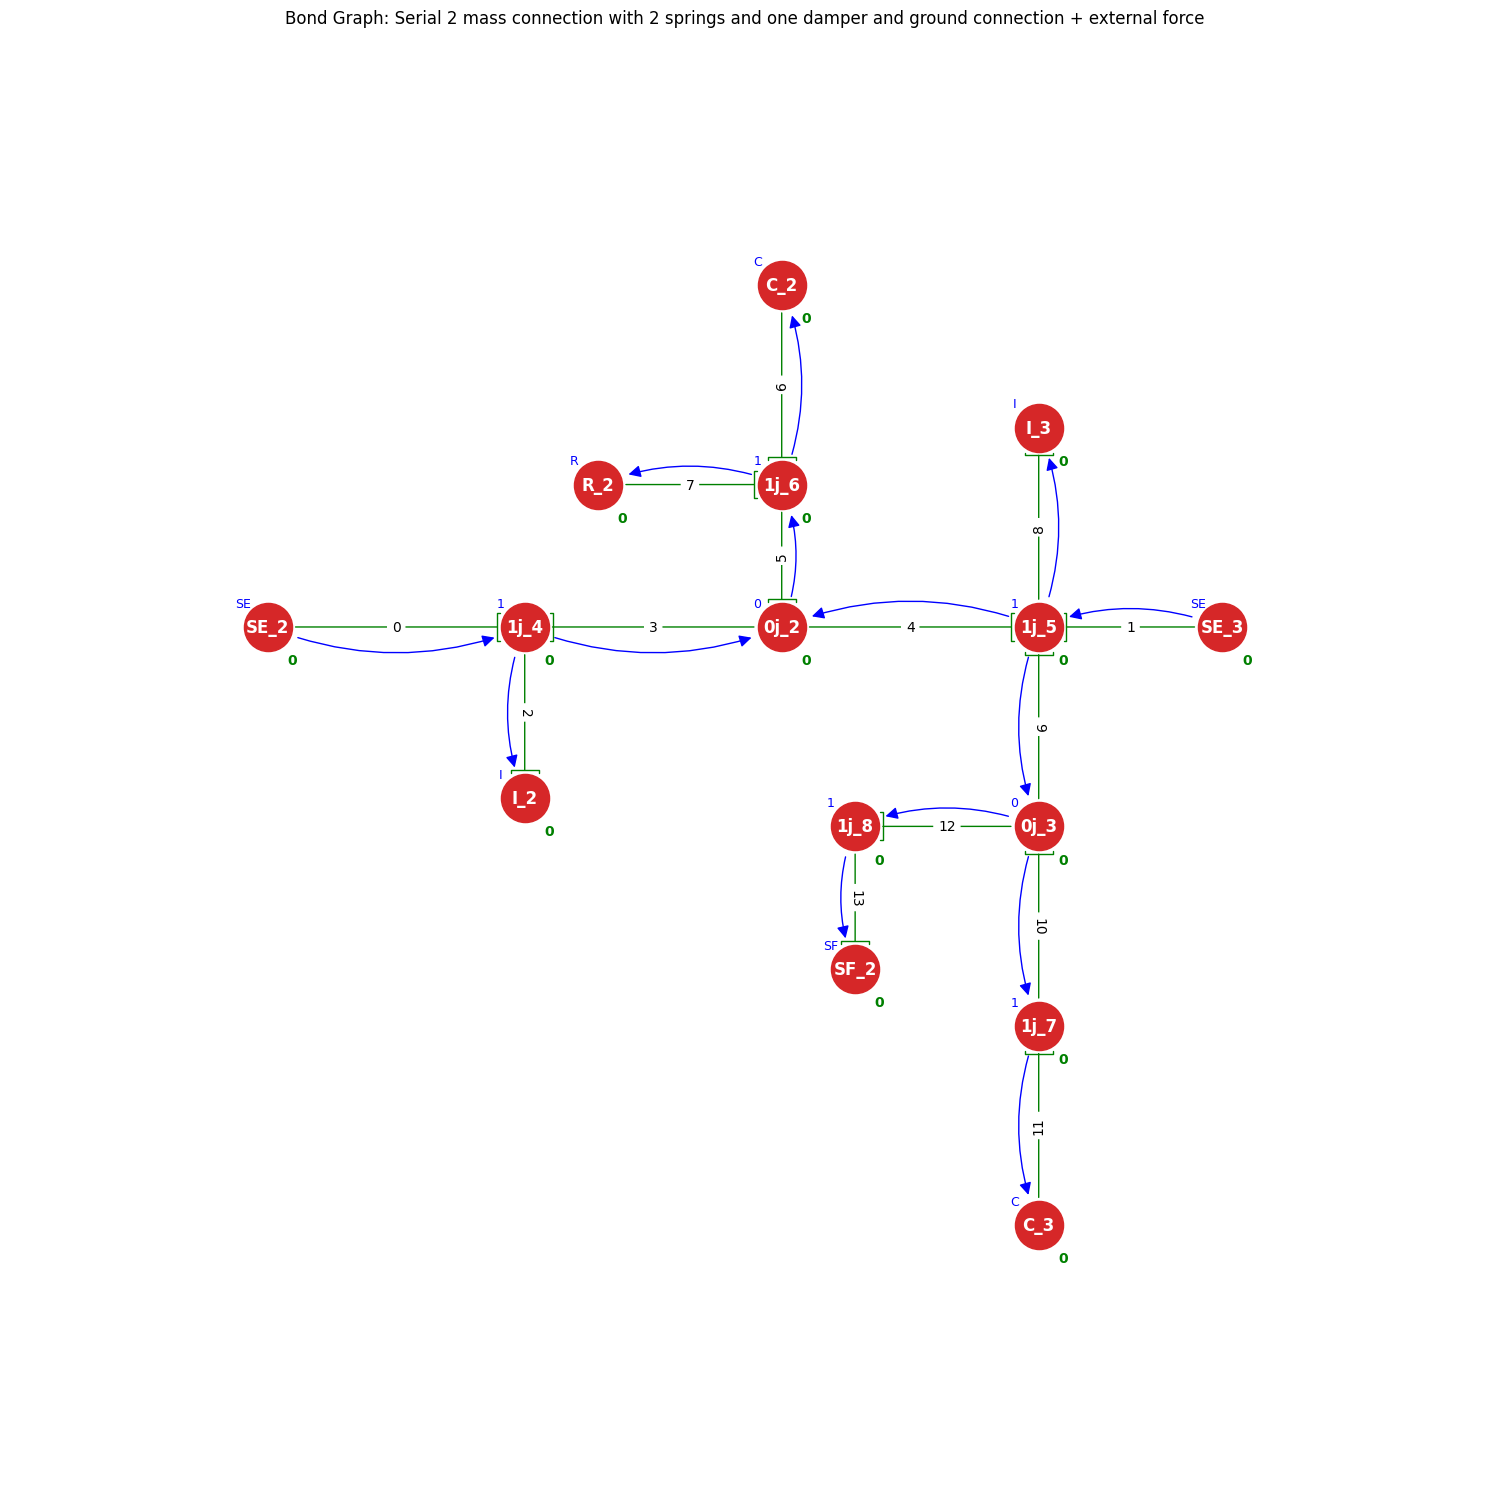

In [5]:

custom_layered_layout(model)

# Draw the graph
draw_bond_graph(model)

In [6]:
# 5) Generate equations (NOT NESS later Cochy will do it)
eqgen = EquationGenerator(model, debug=True)
eqs = eqgen.generate_equations()
# eqgen.visualize_equations()
print(eqs)


[EquationGenerator] Generated equations:
   Eq(e0, SE0)
   Eq(e1, SE1)
   Eq(f2, p6/I6)
   Eq(e6, q3/C3)
   Eq(e7, R5*f7)
   Eq(f8, p7/I7)
   Eq(e11, q4/C4)
   Eq(f13, SF2)
   Eq(f2, f0)
   Eq(f3, f0)
   Eq(e0 - e2 - e3, 0)
   Eq(f4, f1)
   Eq(f8, f1)
   Eq(f9, f1)
   Eq(e1 - e4 - e8 - e9, 0)
   Eq(e4, e3)
   Eq(e5, e3)
   Eq(f3 + f4 - f5, 0)
   Eq(f6, f5)
   Eq(f7, f5)
   Eq(e5 - e6 - e7, 0)
   Eq(e10, e9)
   Eq(e12, e9)
   Eq(-f10 - f12 + f9, 0)
   Eq(f11, f10)
   Eq(e10 - e11, 0)
   Eq(f13, f12)
   Eq(e12 - e13, 0)
[Eq(e0, SE0), Eq(e1, SE1), Eq(f2, p6/I6), Eq(e6, q3/C3), Eq(e7, R5*f7), Eq(f8, p7/I7), Eq(e11, q4/C4), Eq(f13, SF2), Eq(f2, f0), Eq(f3, f0), Eq(e0 - e2 - e3, 0), Eq(f4, f1), Eq(f8, f1), Eq(f9, f1), Eq(e1 - e4 - e8 - e9, 0), Eq(e4, e3), Eq(e5, e3), Eq(f3 + f4 - f5, 0), Eq(f6, f5), Eq(f7, f5), Eq(e5 - e6 - e7, 0), Eq(e10, e9), Eq(e12, e9), Eq(-f10 - f12 + f9, 0), Eq(f11, f10), Eq(e10 - e11, 0), Eq(f13, f12), Eq(e12 - e13, 0)]


In [7]:
cform = CauchyFormGenerator(model, debug=False)
eqs = cform.build_cauchy_form()

self.final_vars =  [SE0, SE1, p6, I6, q3, C3, R5, p7, I7, q4, C4, SF2]
START RECURECIEVE SUBS

[CAUCHY STATE 1] Исходное: dotp6 = e2

[CAUCHY STATE 2] Исходное: dotq3 = f6

[CAUCHY STATE 3] Исходное: dotp7 = e8

[CAUCHY STATE 4] Исходное: dotq4 = f11


In [8]:
print("User have to define the output variables for the system to make possive the output equations generation")
print(cform.get_all_ef_variables())

User have to define the output variables for the system to make possive the output equations generation
[e0, e1, e10, e11, e12, e13, e2, e3, e4, e5, e6, e7, e8, e9, f0, f1, f10, f11, f12, f13, f2, f3, f4, f5, f6, f7, f8, f9]


In [9]:
# cform.interactive_generate_output_equations()
# Instead of input we can provide variables via code
cform.generate_output_equations('e11, f11')


Debug state: False
Entered list ['e11', 'f11']
symb entered list [e11, f11]

[OUTPUT] ROW Eq for output variable: e11 [<class 'sympy.core.symbol.Symbol'>]

[OUTPUT] ROW Eq for output variable: f11 [<class 'sympy.core.symbol.Symbol'>]

[INFO] Output equations:
Eq(e11, q4/C4)
Eq(f11, f10)

[OUTPUT] Generating output equation for: 1

[CAUCHY OUT 1] Исходное: e11 = q4/C4
my_subs {}

[OUTPUT] Generating output equation for: 2

[CAUCHY OUT 2] Исходное: f11 = f10
my_subs {f10: -SF2 + p7/I7}


[Eq(e11, q4/C4), Eq(f11, -SF2 + p7/I7)]

In [10]:
print("Сauchy form equations:")
for i in cform.cauchy_equations:
    print(i)

Сauchy form equations:
Eq(dotp6, SE0 - R5*p7/I7 - R5*p6/I6 - q3/C3)
Eq(dotq3, p7/I7 + p6/I6)
Eq(dotp7, SE1 - R5*p7/I7 - R5*p6/I6 - q4/C4 - q3/C3)
Eq(dotq4, -SF2 + p7/I7)


In [11]:
print("Output equations: ")
for i in cform.output_eqs:
    print(i)

Output equations: 
Eq(e11, q4/C4)
Eq(f11, -SF2 + p7/I7)


In [12]:
print(f"System has variables:{cform.final_vars}")

System has variables:[SE0, SE1, p6, I6, q3, C3, R5, p7, I7, q4, C4, SF2]


## Make state-space eq in matrix from (A B С D)

In [12]:
ssb = StateSpaceBuilder(model, cform, debug=False)
A, B, C, D = ssb.build_state_space()


In [13]:
ssb.x_vars, ssb.u_vars

([p6, q3, p7, q4], [SE0, SE1, SF2])

In [14]:
A, B , C, D 

(Matrix([
 [-R5/I6, -1/C3, -R5/I7,     0],
 [  1/I6,     0,   1/I7,     0],
 [-R5/I6, -1/C3, -R5/I7, -1/C4],
 [     0,     0,   1/I7,     0]]),
 Matrix([
 [1, 0,  0],
 [0, 0,  0],
 [0, 1,  0],
 [0, 0, -1]]),
 Matrix([
 [0, 0,    0, 1/C4],
 [0, 0, 1/I7,    0]]),
 Matrix([
 [0, 0,  0],
 [0, 0, -1]]))

## Make numerical matrixes from symbolic

In [15]:
sim = BondGraphSimulator(model, ssb)

sim.print_simulation_requirements()  # shows the required parameters (order is important)


=== Required Data for Numerical Simulation ===
System parameters (provide param_values: dict[str, float]):
    C3, C4, I6, I7, R5
   Example: param_values = {'R1': 10.0, 'C2': 0.001, 'L3': 0.1}

State variables (provide x0: list[float], in the same order):
    p6, q3, p7, q4
   Example: x0 = [0.0, 0.0]   # (e.g., q2=0, p3=0)
[p6, q3, p7, q4]
Input variables (provide u_func: Callable[[float], list[float]], in the same order):
    SE0, SE1, SF2
   Example: u_func = lambda t: [1.0]   # if a single input, e.g., SE0=1 always
           u_func = lambda t: [np.sin(t)]  # sinusoidal input
-------------------------------------------------------
Full function call:
  result = sim.simulate(param_values, t_span=(0, 5), x0=x0, u_func=u_func)
  t, y = result['t'], result['y']


In [34]:
initial_state = [0.0] * len(sim.ss.x_vars) # fill zeros or define custom list as shown in DEMO 1
num_steps  = 501
subi = [0.0]*len(sim.ss.u_vars)
input_sequence = [subi for _ in range(num_steps)] # inputs are zeros
# lets set all SF = 0 (fixed frame), and SE = 1 (suppose gravity)
for ix, u in enumerate(sim.ss.u_vars):
    for i in range(num_steps):
        if str(u)[:2] == 'SE':
            input_sequence[i][ix] = 1.0


In [35]:
input_sequence

[[1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 1.0

In [36]:
simulation_time_to = 15 # sec
time_steps = np.linspace(0, simulation_time_to, num_steps)
sampling_period = time_steps[1] - time_steps[0] # sampling_period=0.05

In [46]:
# parameter_values = {'C3': 1/1.1, 'I2': 1.01, 'R1': 1.01} # С is complaence (not stifness K)
parameter_values = {'C3':0.2, 'C4':0.2, 'I6':1, 'I7':1, 'R5':2}
result = sim.simulate(initial_state, input_sequence, time_steps, sampling_period, parameter_values)


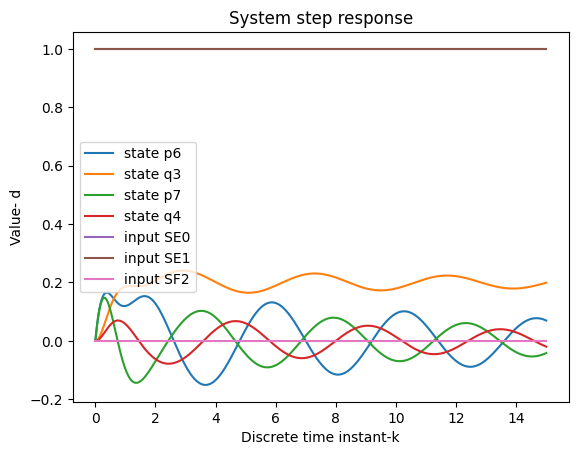

In [47]:
for ix, state_name in enumerate(sim.ss.x_vars):
    plt.plot(result['t'], result['x'][:,ix], label={"state " + str(state_name)})
    
for ix, input_name in enumerate(sim.ss.u_vars):
    plt.plot(result['t'], result['u'][:,ix], label={"input "+ str(input_name)})

plt.xlabel('Discrete time instant-k')
plt.ylabel('Value- d')

plt.title('System step response')
plt.legend()
plt.show()

y.shape= (501, 2)
output_names= ['y1', 'y2']


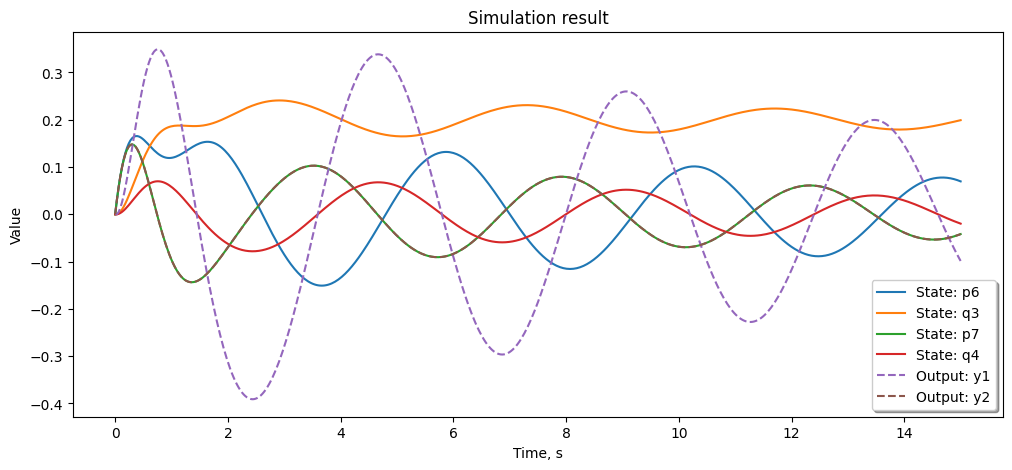

In [48]:
state_names = [str(s) for s in sim.ss.x_vars]        # ['q2', 'p3', ...]
output_names = [str(y) for y in sim.ss.output_vars]  # ['e4', 'f7', ...]

sim.plot_simulation_result(result, state_names, output_names)